# Давлеканова Азалия ПМ22-6 
# 5 вариант

Провести выбор между моделями: линейной и полулогарифмической, используя следующие методы сравнения: 
1. Метод Зарембки
2. Тест Бокса-Кокса
3. Критерий Акаике
4. Критерий Шварца
5. Тест Бера МакАлера
6. Тест МакКиннона, Уайта, Дэвидсона

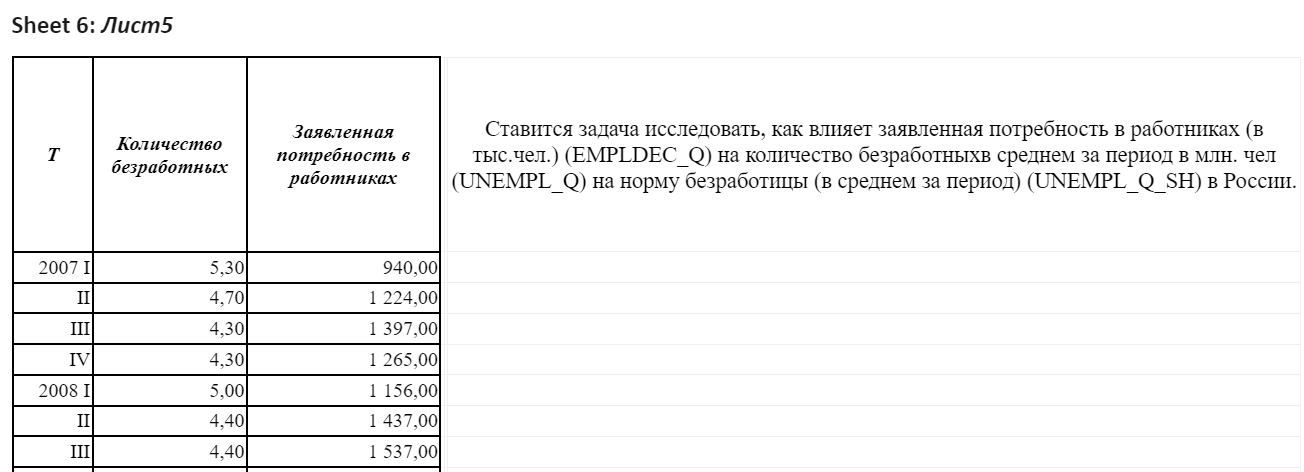

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy.stats import *
from scipy.stats import t 

Ставится задача исследовать, как влияет заявленная потребность в работниках EMPLDEC_Q (X) на количество безработных UNEMPL_Q (Y)

In [20]:
data = pd.read_excel('dz1.xlsx',  usecols='B:C',decimal=',')

data.columns = ['Y', 'X']

In [21]:
data

,Y,X
0,5.3,940.0
1,4.7,1224.0
2,4.3,1397.0
3,4.3,1265.0
4,5.0,1156.0
5,4.4,1437.0
6,4.4,1537.0
7,5.2,1278.0
8,6.6,873.0
9,6.6,1116.0


Посмотрим на среднее значение и разброс данных с помощью графика box plot

<AxesSubplot:>

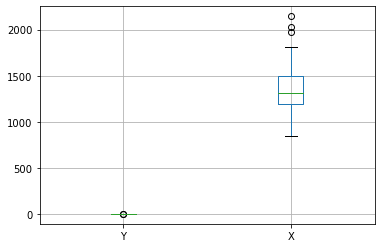

In [22]:
data.boxplot()

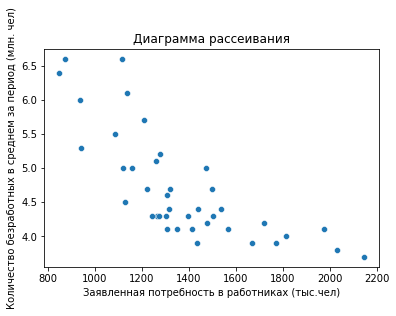

In [23]:
x = data['X'] 
y = data['Y'] 
sns.scatterplot(x=x, y=y)
plt.xlabel('Заявленная потребность в работниках (тыс.чел)')
plt.ylabel('Количество безработных в среднем за период (млн. чел)')
plt.title('Диаграмма рассеивания')
plt.show()

По диаграмме рассеивания видно, что зависимость между переменными больше напоминает обратную.

# Спецификация линейной модели

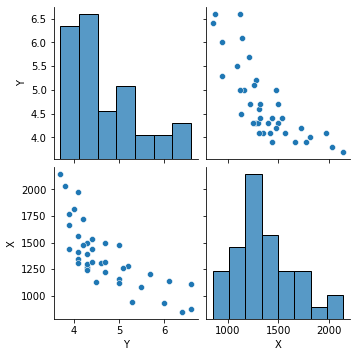

In [24]:
sns.pairplot(data)

In [27]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     49.97
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           1.99e-08
Time:                        22:45:13   Log-Likelihood:                -29.952
No. Observations:                  40   AIC:                             63.90
Df Residuals:                      38   BIC:                             67.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4203      0.394     18.815      0.000       6.622       8.219
X             -0.0020      0.000     -7.069      0.000      -0.003      -0.001
==============================================================================
Omnibus:                        2.849   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.524
Skew:                           0.604   Prob(JB):                        0.283
Kurtosis:                       2.764   Cond. No.                     6.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

коэффициенты значимы, уравнение в целом также значимо

# Спецификация полулогарифмической модели

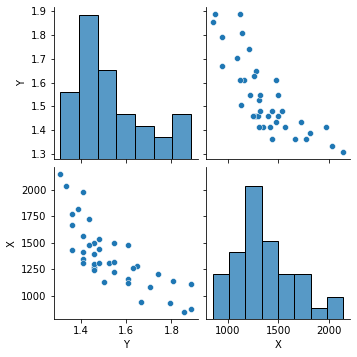

In [28]:
data1 = data.copy()
data1['Y'] = np.log(data1['Y'])
sns.pairplot(data1)

In [29]:
x1 = data1['X'] 
y1 = data1['Y'] 
X1 = sm.add_constant(x1)
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     57.65
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           3.94e-09
Time:                        22:45:19   Log-Likelihood:                 36.193
No. Observations:                  40   AIC:                            -68.39
Df Residuals:                      38   BIC:                            -65.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0941      0.075     27.748      0.000       1.941       2.247
X             -0.0004   5.38e-05     -7.592      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        1.623   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.549
Skew:                           0.396   Prob(JB):                        0.461
Kurtosis:                       2.450   Cond. No.                     6.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

коэффициенты значимы, уравнение в целом также значимо

# Метод Зарембки

вычисляется среднее геометрическое по выборке

In [31]:
prod=1
for i in range(len(data)):
    prod=prod*data['Y'][i]

In [32]:
prod1=0
for i in range(len(data1)):
    prod1=prod1+data1['Y'][i]

In [33]:
y_geom_data=prod**(1/len(data))

In [34]:
y_geom_data

4.636293156462348

In [35]:
y_geom_data1=np.exp(1/len(data1)*prod1)
y_geom_data1

4.636293156462348

наблюдения $y_i$ пересчитываются. новые:

In [36]:
data['Y_new']=data['Y']/y_geom_data
data1['Y_new']=np.log(data['Y']/y_geom_data1)

Рассматриваются линейная регрессия с наблюдениями $y_i^*$   вместо $y_i$, и логарифмическая регрессия с наблюдениями $ln y_i^*$ вместо $ln y_i$

In [37]:
data['const']=1
data1['const']=1
result = sm.OLS(data['Y_new'], data[['const', 'X']]).fit()
result1 = sm.OLS(data1['Y_new'], data1[['const', 'X']]).fit()

In [38]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     49.97
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           1.99e-08
Time:                        23:09:15   Log-Likelihood:                 31.405
No. Observations:                  40   AIC:                            -58.81
Df Residuals:                      38   BIC:                            -55.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6005      0.085     18.815      0.0

коэффициенты значимы, уравнение в целом также значимо

Находим остаточные суммы квадратов остатков для полученных вспомогательных регрессий $ESS_1$ и $ESS_2$

In [39]:
ess1=sum(result.resid**2)

In [40]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     57.65
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           3.94e-09
Time:                        23:09:15   Log-Likelihood:                 36.193
No. Observations:                  40   AIC:                            -68.39
Df Residuals:                      38   BIC:                            -65.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5601      0.075      7.422      0.0

коэффициенты значимы, уравнение в целом также значимо

In [41]:
ess2=sum(result1.resid**2)

Составляем статистику $Z = |\frac n2 ln \frac {ESS_1}{ESS_2}|$. И сравниваем ее с табличным распределением Хи-квадрат с одной степенью свободы

In [42]:
z=abs(len(data)/2*np.log(ess1/ess2))
z

4.78801488693304

In [43]:
import scipy.stats as stats
stats.chi2.ppf(0.95,1)

3.841458820694124

полулогарифмическая модель лучше, так как $Z>χ^2_1(α)$, значит отсутствует статистически значимая разница между моделями

# Тест Бокса-Кокса

In [44]:
lamda = np.arange(0.1, 1, 0.01)

In [45]:
ess_list = []

for i in lamda:
    data_help=data.copy()
    data_help['X']=data_help['X']**i/i
    ess_list.append(sum(sm.OLS(data['Y_new']**i/i, data_help[['const', 'X']]).fit().resid**2))

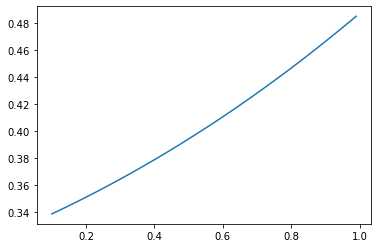

In [46]:
plt.plot(lamda, ess_list)

Выбираем полулогарифмическую модель, так как ESS меньше для λ=0

# Критерий Акаике

рассчитывается статистика Акаике $AIC = ln (\frac {ESS_k}{n}) + \frac {2k}{n} + 1 + ln (2 \pi)$

In [47]:
ess11=sum(sm.OLS(data['Y'], data[['const', 'X']]).fit().resid**2)
ess12=sum(sm.OLS(data1['Y'], data1[['const', 'X']]).fit().resid**2)
AIC1=np.log(ess11/len(data))+2/len(data)+1+np.log(2*np.pi)
AIC2=np.log(ess12/len(data))+2/len(data)+1+np.log(2*np.pi)

In [48]:
AIC1

1.5475858836857093

In [49]:
AIC2

-1.7596451771870916

При увеличении объясняющих переменных первое слагаемое в правой части уменьшается, второе – увеличивается.
Среди нескольких альтернативных моделей предпочтение отдается модели, с наименьшим значением статистики AIC, то есть, в нашем случае, полулогарифмической

# Критерий Шварца

Рассчитывается статистика Шварца $SC = ln (\frac {ESS_k}{n}) + \frac {k ln(n)}{n} + 1 + ln (2 \pi)$

In [50]:
SC1=np.log(ess11/len(data))+np.log(len(data))/len(data)+1+np.log(2*np.pi)
SC2=np.log(ess12/len(data))+np.log(len(data))/len(data)+1+np.log(2*np.pi)

In [52]:
SC1

1.5898078700385576

In [53]:
SC2

-1.7174231908342428

При увеличении количества объясняющих переменных первое слагаемое в правой части уменьшается, а второе – увеличивается. Среди нескольких альтернативных моделей предпочтение отдается модели с наименьшим значением статистики Шварца, то есть, в нашем случае, полулогарифмической

# Тест Бера-МакАлера

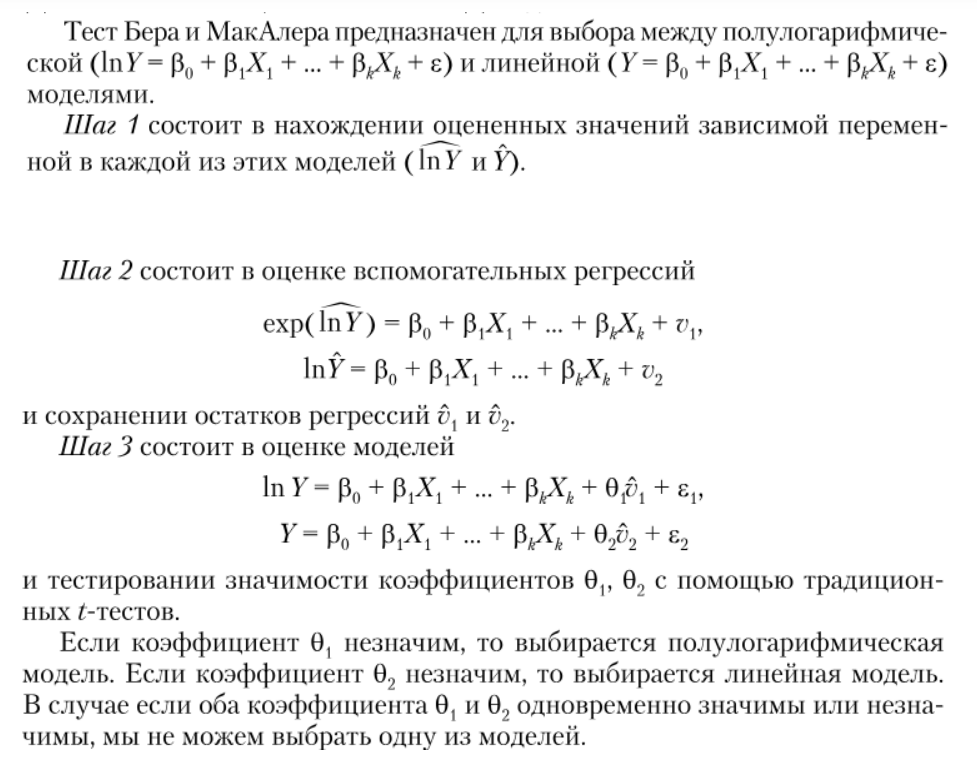

нахождение оцененных значений зависимой переменной в каждой из моделей

In [58]:
pred1 = sm.OLS(data['Y'], data[['const', 'X']]).fit().predict() # линейная \hat{Y}
pred2 = sm.OLS(data1['Y'], data[['const', 'X']]).fit().predict() # полулогарифмическая \hat{\ln{Y}}

оценка вспомогательных регрессий и сохранение остатков регрессий

In [60]:
upsilon_1 = sm.OLS(np.log(pred1), data[['const', 'X']]).fit().resid # для линейной \ln{\hat{Y}}
upsilon_2 = sm.OLS(np.exp(pred2), data[['const', 'X']]).fit().resid # для полулогарифмической \exp{\hat{\ln{Y}}}

In [61]:
data['upsilon_1'] = upsilon_1 
data1['upsilon_2'] = upsilon_2 

оценка моделей и тестирование значимости коэффициентов $\theta_1$, $\theta_2$ 

In [65]:
pred1_2 = sm.OLS(data['Y'], data[['const', 'X', 'upsilon_1']]).fit().tvalues 
pred2_2 = sm.OLS(data1['Y'], data1[['const', 'X', 'upsilon_2']]).fit().tvalues 

In [71]:
p = 2
n = 39
ttable = t.ppf(0.95, n-p-1)
t_value = pred1_2['upsilon_1']
t_value, ttable, np.abs(t_value) > ttable

(-3.65460392844131, 1.6882977108049164, True)

In [73]:
t_value = pred2_2['upsilon_2']
t_value, ttable, np.abs(t_value) > ttable

(3.41816703408996, 1.6882977108049164, True)

In [74]:
data.drop(["upsilon_1"], axis=1, inplace=True)
data1.drop(["upsilon_2"], axis=1, inplace=True)

оба коэффициенты одновременно значимы, мы не можем выбрать одну из моделей

# Тест МакКиннона, Уайта, Дэвидсона

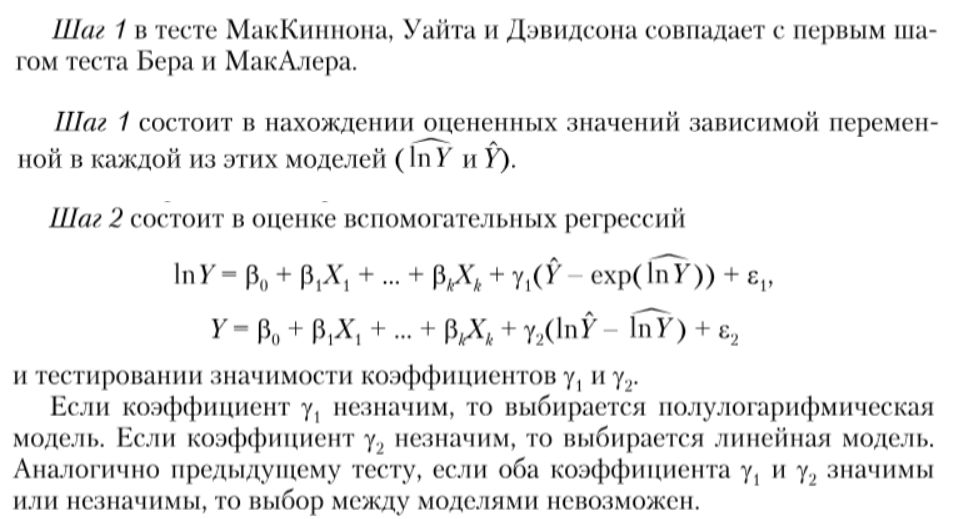

нахождение оцененных значений зависимой переменной в каждой модели

In [76]:
pred1 = sm.OLS(data['Y'], data[['const', 'X']]).fit().predict() # линейная \hat{Y}
pred2 = sm.OLS(data1['Y'], data[['const', 'X']]).fit().predict() # полулогарифмическая \hat{\ln{Y}}

оценка вспомогательных регрессий и тестирование значимости коэффициентов $\gamma_1$, $\gamma_2$

In [79]:
#добавляем столбцы со вспомогательными регрессиями
data["temp1"] = np.log(pred2) - pred1 # \ln{\hat{Y}} - \hat{\ln{Y}}
data1["temp2"] = pred2 - np.exp(pred1) # \hat{Y} - \exp{\hat{\ln{Y}}}

In [82]:
predict1_2 = sm.OLS(np.log(pred1), data[['const', 'X', 'temp1']]).fit().tvalues 
predict2_2 = sm.OLS(np.log(pred1), data1[['const', 'X', 'temp2']]).fit().tvalues

In [83]:
ttable = t.ppf(0.95, n-p-1)
t_value = predict1_2['temp1']
t_value, ttable, np.abs(t_value) > ttable

(148.2855144677915, 1.6882977108049164, True)

In [84]:
ttable = t.ppf(0.95, n-p-1)
t_value = predict2_2['temp2']
t_value, ttable, np.abs(t_value) > ttable

(18.668432537870704, 1.6882977108049164, True)

так как оба коэффициента значимы, выбор между моделями невозможен

# Вывод

1. Метод Зарембки - полулогарифмическая
2. Тест Бокса-Кокса - полулогарифмическая
3. Критерий Акаике - полулогарифмическая
4. Критерий Шварца - полулогарифмическая 
5. Тест Бера МакАлера - нельзя выбрать модель
6. Тест МакКиннона, Уайта, Дэвидсона - нельзя выбрать модель